In [34]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

In [35]:
webpage = requests.get('https://www.scrapethissite.com/pages/simple/')
soup = BeautifulSoup(webpage.content, 'html.parser')

country_names = soup.find_all(attrs = {'class':'country-name'})
countries = []
for country in country_names:
    countries.append(country.get_text())

for i in range(len(countries)):
    countries[i] = countries[i].strip()
        
country_capitals = soup.find_all(attrs = {'class':'country-capital'})
capitals = []
for country in country_capitals:
    capitals.append(country.get_text())
    
country_pop = soup.find_all(attrs = {'class':'country-population'})
populations = []
for country in country_pop:
    populations.append(str(country.get_text()))
    
country_area = soup.find_all(attrs = {'class':'country-area'})
areas = []
for country in country_area:
    areas.append(str(country.get_text()))
    
    
df = pd.DataFrame({'Country Name' : countries, 'Capital' : capitals, 'Population' : populations, 'Country Area' : areas })


df.to_csv("scrape_test.csv")

df

,Country Name,Capital,Population,Country Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


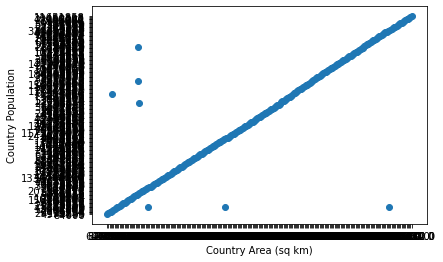

In [36]:
plt.scatter(x = df['Country Area'], y = df.Population)
plt.xlabel('Country Area (sq km)')
plt.ylabel('Country Population')

plt.show()